<a href="https://colab.research.google.com/github/dmitrymazilkin/dmitrymazilkin/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%9C%D0%B0%D0%B7%D0%B8%D0%BB%D0%BA%D0%B8%D0%BD_%D0%94_%D0%92_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1b12-alS4EHxAFb2qKfn0Vbb2MWsmJ56-

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1b12-alS4EHxAFb2qKfn0Vbb2MWsmJ56-
To: /content/result roles (16.06.2022).xlsx
100% 86.3M/86.3M [00:01<00:00, 49.0MB/s]


**Создаю датасет и изучаю его.**


In [2]:
!pip install -q xlrd
import pandas as pd
import numpy as np
#создаю из файла датасет
dataset = pd.read_excel('result roles (16.06.2022).xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76382 non-null  int64 
 1   id                        76382 non-null  int64 
 2   premium                   76382 non-null  bool  
 3   name                      76382 non-null  object
 4   department                4902 non-null   object
 5   has_test                  76380 non-null  object
 6   response_letter_required  76382 non-null  object
 7   area                      76381 non-null  object
 8   salary                    40874 non-null  object
 9   type                      76379 non-null  object
 10  published_at              76380 non-null  object
 11  created_at                76381 non-null  object
 12  archived                  76380 non-null  object
 13  insider_interview         570 non-null    object
 14  url                   

**Исходный датасет содержит 76382 строки и 50 колонок. Типы данных: 1 логический, 2 целочисленных и строковый 48.**

In [3]:
# Смотрю на колонки и данные
dataset.head(3)


,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,54252278,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,54428119,False,Асессор-тестировщик,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Удаляю лишние столбцы и дубликаты (дубликатами считаю совпавшие по полям: название, город, работодатель, режим работы - т.е полные аналоги)
dataset.drop([col for col in dataset.columns if "Unnamed" in col], axis=1, inplace=True)
dataset.drop(['id', 'premium', 'url', 'alternate_url'], axis=1, inplace=True)
dataset.drop_duplicates(subset=['name', 'area', 'employer', 'snippet', 'schedule'], keep='first', inplace=True)
dataset.shape

(75648, 24)

**После удаления лишних столбцов и идентичных вакансий датасет стал содержать 24 колонки и 75648 записей**

In [5]:
import ast
# Функция преобразования для словаря
def transform_dict(data):
  try:
    if type(data) != bool :
      return ast.literal_eval(data)
    else :
      return {}
  except:
    return {}    

In [6]:
# Применяем преобразование 
dataset['salary'] = dataset["salary"].apply(transform_dict)

In [7]:
# Функция по извлечению минимальной зарплаты
def min_salary(salary):
  try:
    min_salary = salary.get('from', None)
  except:
    return None
  return min_salary

# Функция по извлечению максимальной зарплаты
def max_salary(salary):
  try:
    max_salary = salary.get('to', None)
  except:
    return None
  return max_salary

# Функция по извлечению валюты
def currency(salary):
  try:
    currency = salary.get('currency', None)
  except:
    return None
  return currency

In [8]:
# Извлекаю данные из словаря с зарплатой в новые колонки, старую колонку удаляю
dataset['min_salary'] = dataset["salary"].apply(min_salary)
dataset['max_salary'] = dataset["salary"].apply(max_salary)
dataset['currency'] = dataset["salary"].apply(currency)
dataset.drop(['salary'], axis=1, inplace=True)

In [9]:
# Смотрю, что получилось
dataset.head(5)

,name,department,has_test,response_letter_required,area,type,published_at,created_at,archived,insider_interview,...,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,min_salary,max_salary,currency
0,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': 'open', 'name': 'Открытая'}",2022-03-28T09:08:00+0300,2022-03-28T09:08:00+0300,False,NaN,...,[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN,NaN,None
1,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': 'open', 'name': 'Открытая'}",2022-04-01T08:52:06+0300,2022-04-01T08:52:06+0300,False,NaN,...,[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,NaN,None
2,Асессор-тестировщик,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': 'open', 'name': 'Открытая'}",2022-03-29T15:20:02+0300,2022-03-29T15:20:02+0300,False,NaN,...,[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,NaN,None
3,Тестировщик (асессор),NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': 'open', 'name': 'Открытая'}",2022-03-29T15:37:33+0300,2022-03-29T15:37:33+0300,False,NaN,...,[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,NaN,None
4,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'id': 'open', 'name': 'Открытая'}",2022-04-07T12:35:39+0300,2022-04-07T12:35:39+0300,False,NaN,...,[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,25000.0,50000.0,RUR


In [10]:
# Перевожу на русский название колонок (мне так удобнее)
dataset.rename(columns={"min_salary": "Минимальная зарплата", "region": "Регион", "max_salary": "Максимальная зарплата", "currency": "Валюта", "name": "Название"}, inplace=True)

In [11]:
# Преобразую колонку регион в удобный вид (в словарь, а не строку)
dataset['area'] = dataset['area'].apply(transform_dict)

In [12]:
# Функция извлечения из словаря
def insert(data, key):
  try:
    insert = data.get(key, None)
  except:
    return None
  return insert

In [13]:
# Трансформирую еще ряд колонок, извлекаю из них данные
dataset['Город'] = dataset["area"].apply(lambda x: insert(x, key='name'))
dataset.drop(['area'], axis=1, inplace=True)

dataset['employer'] = dataset['employer'].apply(transform_dict)
dataset['Работодатель'] = dataset["employer"].apply(lambda x: insert(x, key='name'))
dataset.drop(['employer'], axis=1, inplace=True)

dataset['schedule'] = dataset['schedule'].apply(transform_dict)
dataset['Вид занятости'] = dataset["schedule"].apply(lambda x: insert(x, key='name'))
dataset.drop(['schedule'], axis=1, inplace=True)

dataset['experience'] = dataset['experience'].apply(transform_dict)
dataset['Требуемый опыт'] = dataset["experience"].apply(lambda x: insert(x, key='name'))
dataset.drop(['experience'], axis=1, inplace=True)

dataset['type'] = dataset['type'].apply(transform_dict)
dataset['Тип вакансии'] = dataset["type"].apply(lambda x: insert(x, key='name'))
dataset.drop(['type'], axis=1, inplace=True)

In [14]:
# Смотрю, что получилось
dataset.head(5)

,Название,department,has_test,response_letter_required,published_at,created_at,archived,insider_interview,relations,snippet,...,specializations,Регион,Минимальная зарплата,Максимальная зарплата,Валюта,Город,Работодатель,Вид занятости,Требуемый опыт,Тип вакансии
0,Младший специалист ручного тестирования,NaN,False,False,2022-03-28T09:08:00+0300,2022-03-28T09:08:00+0300,False,NaN,[],{'requirement': 'Внимательны и наблюдательны. ...,...,"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN,NaN,None,Астрахань,Яндекс,Удаленная работа,Нет опыта,Открытая
1,Пентестер,NaN,False,False,2022-04-01T08:52:06+0300,2022-04-01T08:52:06+0300,False,NaN,[],{'requirement': 'Глубокие знания клиентских и ...,...,"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,NaN,None,Астрахань,SearchInform,Полный день,От 3 до 6 лет,Открытая
2,Асессор-тестировщик,NaN,False,False,2022-03-29T15:20:02+0300,2022-03-29T15:20:02+0300,False,NaN,[],{'requirement': 'Консультирование коллег по уж...,...,"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,NaN,None,Астрахань,Яндекс,Удаленная работа,Нет опыта,Открытая
3,Тестировщик (асессор),NaN,False,False,2022-03-29T15:37:33+0300,2022-03-29T15:37:33+0300,False,NaN,[],{'requirement': 'Готовы работать не меньше 20 ...,...,"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN,NaN,None,Астрахань,Яндекс,Удаленная работа,Нет опыта,Открытая
4,Тестировщик.Net,NaN,False,False,2022-04-07T12:35:39+0300,2022-04-07T12:35:39+0300,False,NaN,[],{'requirement': 'Мы ищем талантливого и амбици...,...,"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,25000.0,50000.0,RUR,Астрахань,МФК Саммит,Полный день,От 1 года до 3 лет,Открытая


In [15]:
# Функция преобразования для списков
def transform_list(data):
  try:
    if type(data) != bool :
      return ast.literal_eval(data)
    else :
      return []
  except:
    return []

In [16]:
# Преобразую колонки, которые содержат строковые данные, похожие на список (а не на словарь, как ранее)
dataset["Требуемые навыки"] = dataset["key_skills"].apply(transform_list)
dataset["Требуемые навыки"] = dataset["Требуемые навыки"].apply(lambda x: [] if isinstance(x, (bool, dict)) else x)
dataset["Требуемые навыки"] = dataset["Требуемые навыки"].apply(lambda x: [d.get('name', None) for d in x if isinstance(d, dict)] if isinstance(x, list) else None)

In [17]:
# Удаляю уже ненужные колонки
dataset.drop(['key_skills'], axis=1, inplace=True)
dataset.drop(['department'],axis=1, inplace=True)

In [18]:
# Еще переименовываю колонки
dataset.rename(columns={"has_test": "Нужен тест", "response_letter_required": "Нужны рекомендации", "published_at": "Опубликовано", "created_at": "Создано", "archived": "Архив", "insider_interview": "Интервью"}, inplace=True)
dataset.rename(columns={'relations': "Отношения",
 'snippet': "Фрагмент",
 'working_days' :"Рабочие дни",
 'working_time_intervals' : "Рабочий интервал",
 'working_time_modes': "Модель рабочего времени",
 'accept_temporary': "Временаая работа",
 'description': "Описание",
 'specializations': "Специализация"}, inplace=True)

In [19]:
# Смотрю, что получилось
dataset.head(5)

,Название,Нужен тест,Нужны рекомендации,Опубликовано,Создано,Архив,Интервью,Отношения,Фрагмент,Рабочие дни,...,Регион,Минимальная зарплата,Максимальная зарплата,Валюта,Город,Работодатель,Вид занятости,Требуемый опыт,Тип вакансии,Требуемые навыки
0,Младший специалист ручного тестирования,False,False,2022-03-28T09:08:00+0300,2022-03-28T09:08:00+0300,False,NaN,[],{'requirement': 'Внимательны и наблюдательны. ...,[],...,Астраханская область,NaN,NaN,None,Астрахань,Яндекс,Удаленная работа,Нет опыта,Открытая,[]
1,Пентестер,False,False,2022-04-01T08:52:06+0300,2022-04-01T08:52:06+0300,False,NaN,[],{'requirement': 'Глубокие знания клиентских и ...,[],...,Астраханская область,NaN,NaN,None,Астрахань,SearchInform,Полный день,От 3 до 6 лет,Открытая,"[SQL, Linux, Информационная безопасность, Рабо..."
2,Асессор-тестировщик,False,False,2022-03-29T15:20:02+0300,2022-03-29T15:20:02+0300,False,NaN,[],{'requirement': 'Консультирование коллег по уж...,[],...,Астраханская область,NaN,NaN,None,Астрахань,Яндекс,Удаленная работа,Нет опыта,Открытая,[]
3,Тестировщик (асессор),False,False,2022-03-29T15:37:33+0300,2022-03-29T15:37:33+0300,False,NaN,[],{'requirement': 'Готовы работать не меньше 20 ...,[],...,Астраханская область,NaN,NaN,None,Астрахань,Яндекс,Удаленная работа,Нет опыта,Открытая,[]
4,Тестировщик.Net,False,False,2022-04-07T12:35:39+0300,2022-04-07T12:35:39+0300,False,NaN,[],{'requirement': 'Мы ищем талантливого и амбици...,[],...,Астраханская область,25000.0,50000.0,RUR,Астрахань,МФК Саммит,Полный день,От 1 года до 3 лет,Открытая,"[Git, SQL, Тестирование, C#, API]"


In [20]:
# Предварительнй отбор только IT-вакансий
dataset = dataset[dataset['Специализация'].str.contains("Информационные технологии")]

# Предварительнй отбор только ваканий с непустыми значениями навыков
dataset = dataset[dataset['Требуемые навыки'].map(len) > 3]

# Перевожу зарплаты в рублевый эквивалент
dict_cur = {'RUR': 1, 'USD': 61, 'EUR': 62, 'KZT': 0.13}
dataset['Минимальная зарплата'] = dataset['Минимальная зарплата']* dataset['Валюта'].map(dict_cur)
dataset['Максимальная зарплата'] = dataset['Максимальная зарплата']* dataset['Валюта'].map(dict_cur)

In [21]:
# Меняю типа данных
dataset['Минимальная зарплата'] = dataset['Минимальная зарплата'].astype('Int64')
dataset['Максимальная зарплата'] = dataset['Максимальная зарплата'].astype('Int64')

In [22]:
min_s = dataset['Минимальная зарплата']
print(f'Средняя предлагаемая зарплата в сфере IT: {int(min_s.median())} тысяч рублей')
print(f'Средние зарплаты колеблются в диапазне : {min_s.quantile(0.25)} - {min_s.quantile(0.75)} тысяч рублей')

Средняя предлагаемая зарплата в сфере IT: 70000 тысяч рублей
Средние зарплаты колеблются в диапазне : 42000 - 120000 тысяч рублей


Далее буду рассматривать только минимальную зарплату (как более реальную)

Определение наиболее популярных вакансий

Группирую по значениям колонок.


In [25]:
groups_name = dataset.groupby('Название').agg({'Название':'count', 'Минимальная зарплата':'median', 'Требуемые навыки': 'sum'}).rename(columns={'Название':'Количество вакансий','Минимальная зарплата':'Средняя зарплата'}).reset_index().sort_values(['Количество вакансий'], ascending=False)
groups_name = groups_name.loc[groups_name['Количество вакансий'] > 10].reset_index()
groups_name.drop(['index'],axis=1, inplace=True)
groups_name

,Название,Количество вакансий,Средняя зарплата,Требуемые навыки
0,Системный администратор,1413,50000.0,"[Настройка сетевых подключений, Администрирова..."
1,Программист 1С,733,100000.0,"[1С программирование, 1С: Бухгалтерия, 1С: Пре..."
2,Системный аналитик,437,130000.0,"[UML, XML, SQL, Atlassian Jira, Atlassian Conf..."
3,Специалист технической поддержки,356,40000.0,"[Windows 7, Администрирование, Навыки межлично..."
4,Аналитик,315,50000.0,"[Работа с большим объемом информации, MS Power..."
...,...,...,...,...
308,Дизайнер/ведущий дизайнер в Студию «Луч»,11,<NA>,"[Figma, UX, Web-дизайн, Дизайн интерфейсов, Fi..."
309,Senior Frontend Developer (React),11,150000.0,"[React, CSS3, HTML5, TypeScript, Redux, JavaSc..."
310,Специалист технической поддержки (Wink),11,22000.0,"[Консультирование клиентов по телефону, входящ..."
311,Руководитель отдела развития базовых модулей и...,11,<NA>,"[Руководство коллективом, Постановка задач раз..."


Таким образом определели наиболее популярные вакансии. Эта информация необходима для составления наиболее востребованных онлайн курсов.

In [23]:
# Очищаю список с требуемыми навыками (трансформирую в список)
import re
def skills(data):
  k = re.sub(r'[!@#\'\[$]', '', data).lower()
  k = re.sub(r'[\]]', ', ', k)
  k = re.sub(r' ,', '', k)
  k = k.split(', ')
  l = []
  for i in k:
    if len(i) != 0:
      l.append(i)
    else:
      continue
  return l

In [26]:
groups_name

,Название,Количество вакансий,Средняя зарплата,Требуемые навыки
0,Системный администратор,1413,50000.0,"[Настройка сетевых подключений, Администрирова..."
1,Программист 1С,733,100000.0,"[1С программирование, 1С: Бухгалтерия, 1С: Пре..."
2,Системный аналитик,437,130000.0,"[UML, XML, SQL, Atlassian Jira, Atlassian Conf..."
3,Специалист технической поддержки,356,40000.0,"[Windows 7, Администрирование, Навыки межлично..."
4,Аналитик,315,50000.0,"[Работа с большим объемом информации, MS Power..."
...,...,...,...,...
308,Дизайнер/ведущий дизайнер в Студию «Луч»,11,<NA>,"[Figma, UX, Web-дизайн, Дизайн интерфейсов, Fi..."
309,Senior Frontend Developer (React),11,150000.0,"[React, CSS3, HTML5, TypeScript, Redux, JavaSc..."
310,Специалист технической поддержки (Wink),11,22000.0,"[Консультирование клиентов по телефону, входящ..."
311,Руководитель отдела развития базовых модулей и...,11,<NA>,"[Руководство коллективом, Постановка задач раз..."


In [27]:
#  Применение функции очистки
groups_name['Навыки'] = groups_name['Требуемые навыки'].apply(str).apply(skills)
groups_name.drop(['Требуемые навыки'], axis=1, inplace=True)

In [28]:
# Смотрю, что получилось
groups_name

,Название,Количество вакансий,Средняя зарплата,Навыки
0,Системный администратор,1413,50000.0,"[настройка сетевых подключений, администрирова..."
1,Программист 1С,733,100000.0,"[1с программирование, 1с: бухгалтерия, 1с: пре..."
2,Системный аналитик,437,130000.0,"[uml, xml, sql, atlassian jira, atlassian conf..."
3,Специалист технической поддержки,356,40000.0,"[windows 7, администрирование, навыки межлично..."
4,Аналитик,315,50000.0,"[работа с большим объемом информации, ms power..."
...,...,...,...,...
308,Дизайнер/ведущий дизайнер в Студию «Луч»,11,<NA>,"[figma, ux, web-дизайн, дизайн интерфейсов, fi..."
309,Senior Frontend Developer (React),11,150000.0,"[react, css3, html5, typescript, redux, javasc..."
310,Специалист технической поддержки (Wink),11,22000.0,"[консультирование клиентов по телефону, входящ..."
311,Руководитель отдела развития базовых модулей и...,11,<NA>,"[руководство коллективом, постановка задач раз..."


In [29]:
# отбор топ-10 наиболее востреованных навыков
from collections import Counter
def popular_skills(data):
  words_to_count = data
  most_common_words= [word for word, word_count in Counter(words_to_count).most_common(10)]
  return most_common_words

In [30]:
groups_name['Топ-10 навыков'] = groups_name['Навыки'].apply(popular_skills)

In [31]:
groups_name

,Название,Количество вакансий,Средняя зарплата,Навыки,Топ-10 навыков
0,Системный администратор,1413,50000.0,"[настройка сетевых подключений, администрирова...","[настройка сетевых подключений, настройка пк, ..."
1,Программист 1С,733,100000.0,"[1с программирование, 1с: бухгалтерия, 1с: пре...","[1с программирование, 1с: предприятие 8, 1с: з..."
2,Системный аналитик,437,130000.0,"[uml, xml, sql, atlassian jira, atlassian conf...","[bpmn, sql, uml, системный анализ, разработка ..."
3,Специалист технической поддержки,356,40000.0,"[windows 7, администрирование, навыки межлично...","[техническая поддержка, грамотная речь, настро..."
4,Аналитик,315,50000.0,"[работа с большим объемом информации, ms power...","[ms powerpoint, аналитическое мышление, sql, р..."
...,...,...,...,...,...
308,Дизайнер/ведущий дизайнер в Студию «Луч»,11,<NA>,"[figma, ux, web-дизайн, дизайн интерфейсов, fi...","[figma, ux, web-дизайн, дизайн интерфейсов]"
309,Senior Frontend Developer (React),11,150000.0,"[react, css3, html5, typescript, redux, javasc...","[react, css3, html5, typescript, redux, javasc..."
310,Специалист технической поддержки (Wink),11,22000.0,"[консультирование клиентов по телефону, входящ...","[консультирование клиентов по телефону, входящ..."
311,Руководитель отдела развития базовых модулей и...,11,<NA>,"[руководство коллективом, постановка задач раз...","[руководство коллективом, постановка задач раз..."


In [32]:
# Далее хочу посмотреть частоту упоминания каждого из навыков для этого:
# Получаю список всех навыков
skills_list = groups_name['Навыки'].tolist()
clear_skills = []
for skills in skills_list:
  for skill in skills:
    clear_skills.append(skill)

In [33]:
# Загружаю модуль для подсчета частоты
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [34]:
# Считаю частоту
from nltk.probability import FreqDist
fdist = FreqDist(clear_skills)

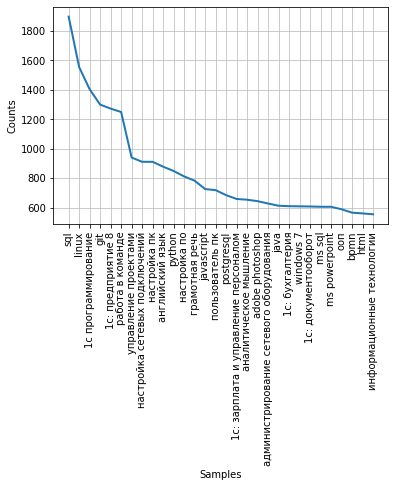

In [35]:
# Наиболее популярные навыки среди всех вакансий
fdist.plot(30,cumulative=False)

In [36]:
# Смотрю, сколько вакансий на какую зарплату в среднем требуется в городах
groups_reg = dataset.groupby('Город').agg({'Город':'count', 'Минимальная зарплата':'median'}).rename(columns={'Город':'Количество вакансий в городе','Минимальная зарплата':'Средняя зарплата'}).reset_index().sort_values(['Количество вакансий в городе'], ascending=False)
groups_reg = groups_reg.loc[groups_reg['Количество вакансий в городе'] > 500].reset_index()
groups_reg.drop(['index'],axis=1, inplace=True)
groups_reg

,Город,Количество вакансий в городе,Средняя зарплата
0,Москва,12436,100000.0
1,Санкт-Петербург,5381,80000.0
2,Новосибирск,1596,80000.0
3,Екатеринбург,1515,75000.0
4,Казань,1292,70000.0
5,Нижний Новгород,1125,60000.0
6,Краснодар,922,61000.0
7,Ростов-на-Дону,787,55000.0
8,Самара,726,60000.0
9,Воронеж,646,60000.0


Графический анализ количественной переменной. Строю ящик с усами для минимальной зарплаты.


<function matplotlib.pyplot.show(*args, **kw)>

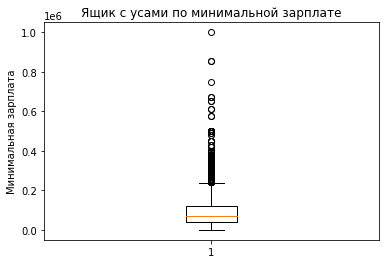

In [39]:
import matplotlib.pyplot as plt
new_min_salary=dataset['Минимальная зарплата'].dropna() # очистил минимальную зарплату от NA значений.
plt.title('Ящик с усами по минимальной зарплате')
plt.ylabel('Минимальная зарплата')
plt.boxplot(new_min_salary)
plt.show


Графический анализ категориальной переменной. (Вид занятости)


In [40]:
import matplotlib.pyplot as plt
work_counts = dataset['Вид занятости'].value_counts()

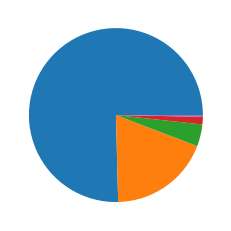

In [41]:
plt.pie(work_counts)
plt.show()

In [42]:
work_counts

Полный день         30180
Удаленная работа     7518
Гибкий график        1629
Сменный график        560
Вахтовый метод        132
Name: Вид занятости, dtype: int64

In [43]:
work_counts.values

array([30180,  7518,  1629,   560,   132])

In [44]:
work_counts.index

Index(['Полный день', 'Удаленная работа', 'Гибкий график', 'Сменный график',
       'Вахтовый метод'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

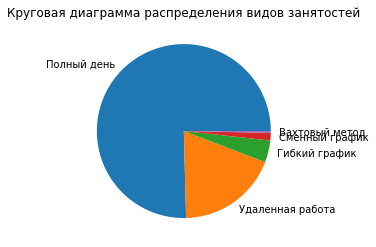

In [45]:
plt.pie(work_counts.values, labels= work_counts.index)
plt.title('Круговая диаграмма распределения видов занятостей')
plt.show

Исходя из разведочного анализа, мы можем понять в каких профессиях нуждается рынок труда. Какие минимальные зарплаты в топ-10 города - это один из критериев, который поможет определить стоимость будущих курсов.
